In [329]:
%load_ext autoreload
%autoreload 2
%matplotlib qt
%matplotlib inline


import numpy as np
import autoreject
import csv
import matplotlib.pyplot as plt
import pandas as pd
import mne
import os
import sys
from atpbar import atpbar
import glob


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Suppress MNE output
#mne.set_log_level('WARNING')
mne.set_log_level('ERROR')
#mne.set_log_level('CRITICAL')
#mne.set_log_level('INFO')



## test for outliers

In [ ]:
# loop to check each individual response and see which ones I wish to exclude

for sub in range(10):
    for day in [1,2,3,4]:
        for meditation in ['jhana', 'mindfulness']:
        
            print(f'sub{sub} {day} {meditation}')
            path = f'/Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/MMN/epochs_ar/sub{sub}-day{day}-{meditation}_epo.fif'
            try:
                epochs = mne.read_epochs(path)
                epochs.interpolate_bads(reset_bads=True).pick_types(eeg=True).filter(l_freq=None, h_freq=40)
                evokeds = epochs.average()
                evokeds.pick_channels(['Fz', 'Cz', 'FC1', 'FC2'])
                evokeds.plot()
            except: 
                pass

sub0 1 jhana


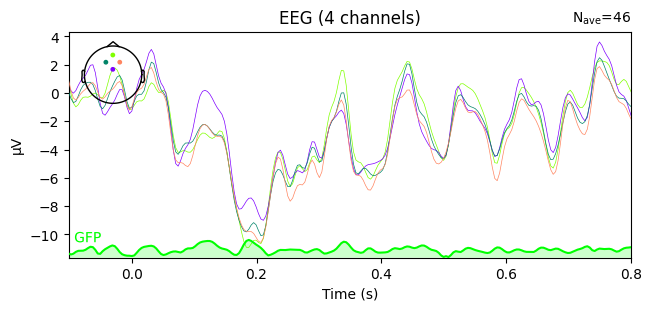

sub0 1 mindfulness


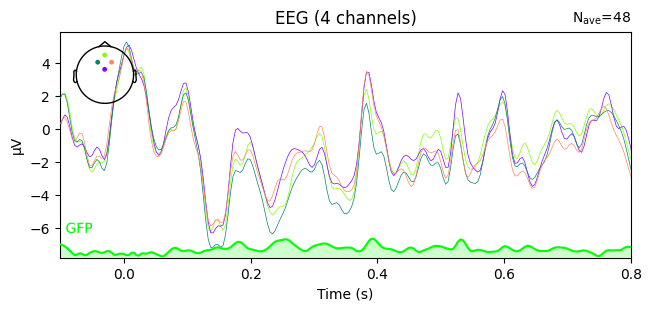

sub0 2 jhana


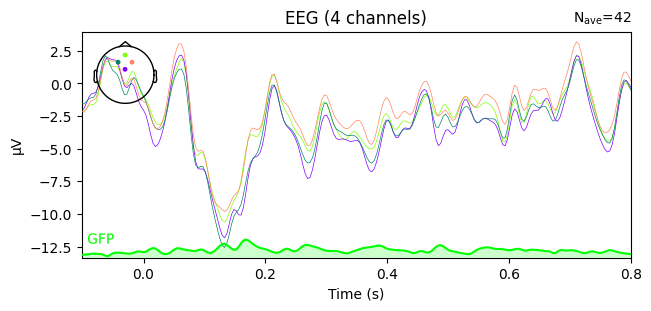

sub0 2 mindfulness


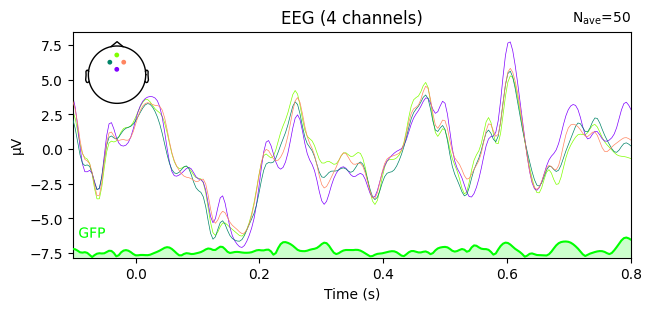

sub0 3 jhana


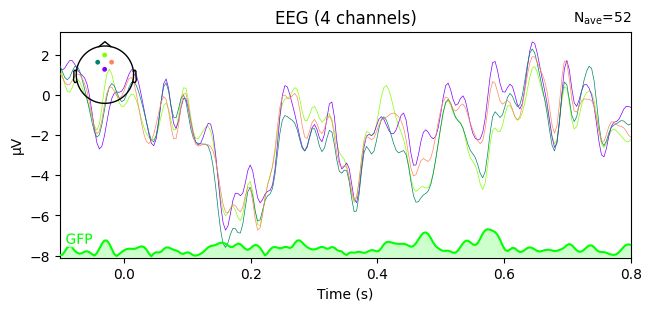

sub0 3 mindfulness


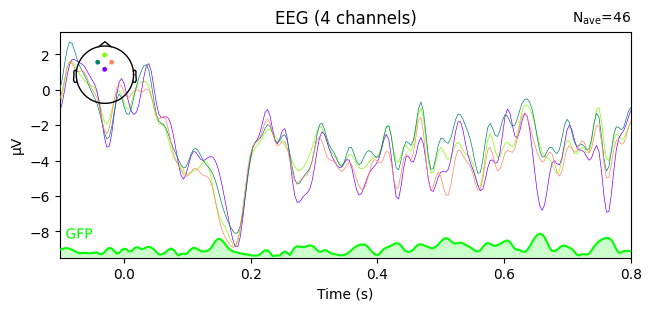

sub0 4 jhana


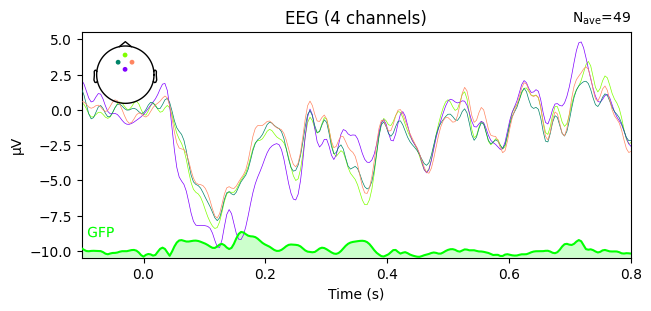

sub0 4 mindfulness


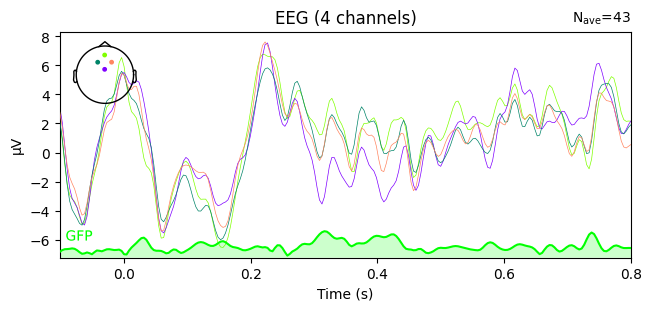

sub1 1 jhana


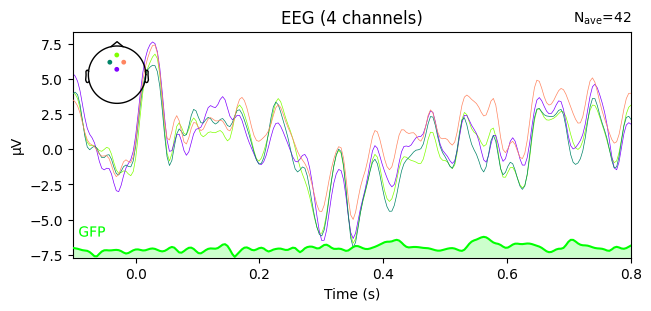

sub1 1 mindfulness


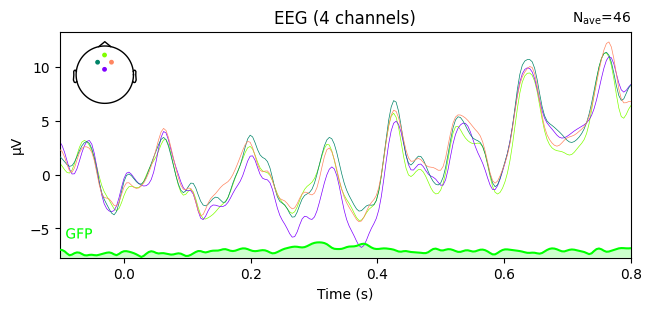

sub1 2 jhana


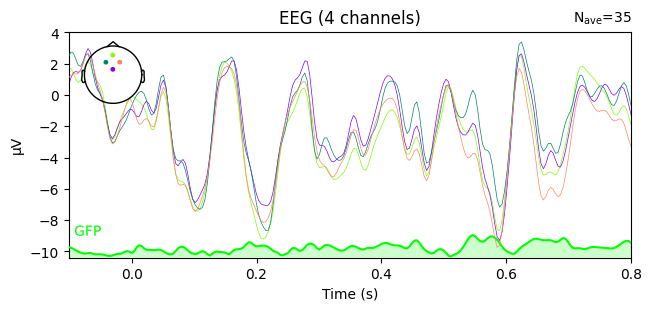

sub1 2 mindfulness


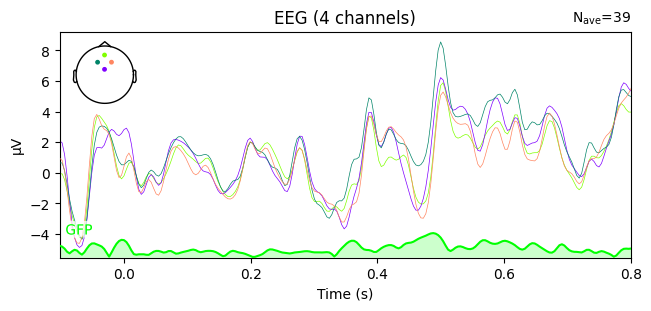

sub1 3 jhana


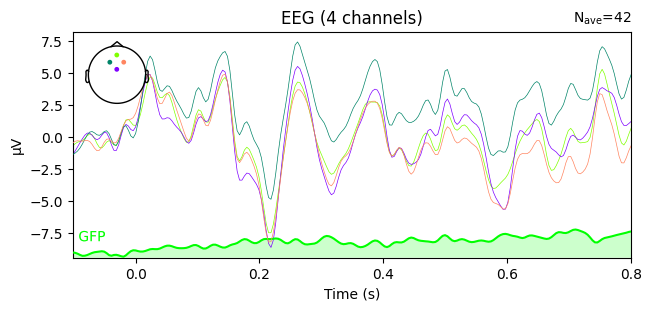

sub1 3 mindfulness


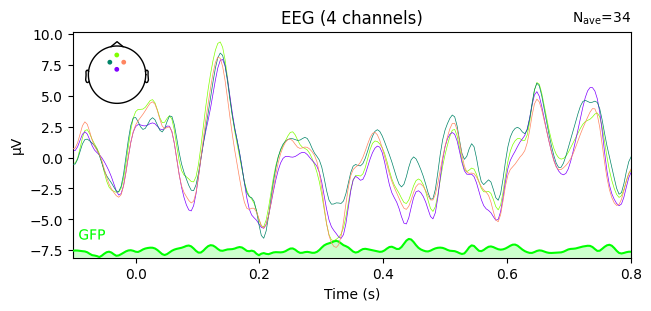

sub1 4 jhana


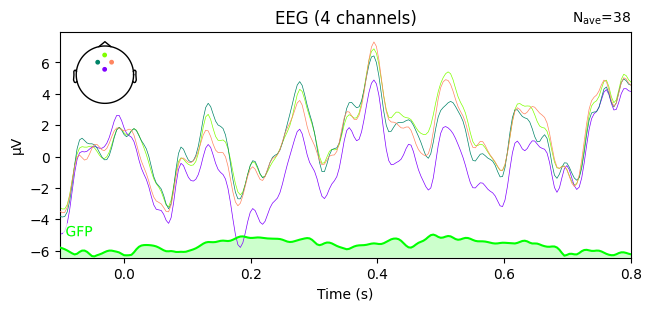

sub1 4 mindfulness


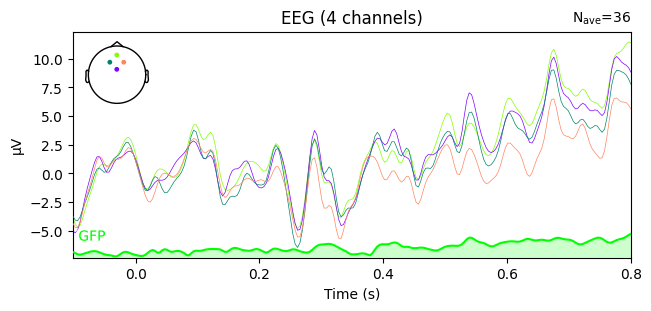

sub2 1 jhana


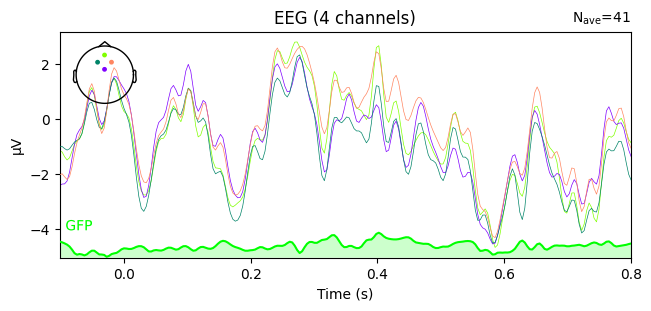

sub2 1 mindfulness


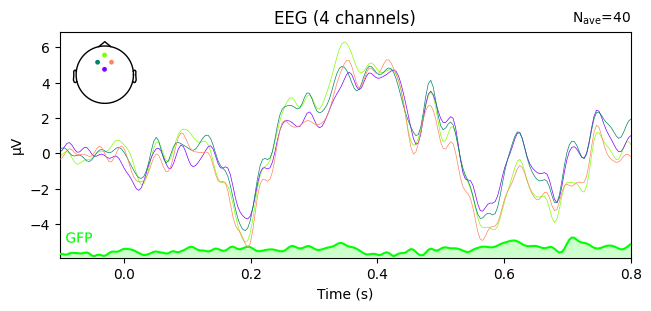

sub2 2 jhana


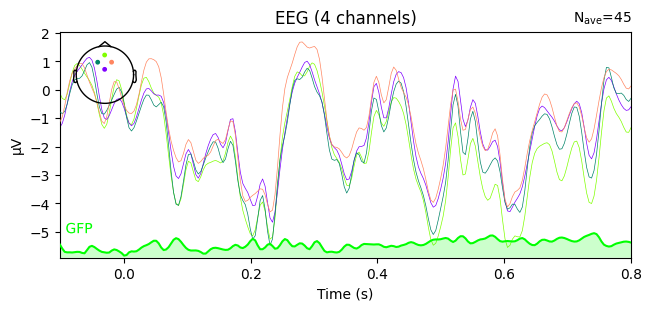

sub2 2 mindfulness


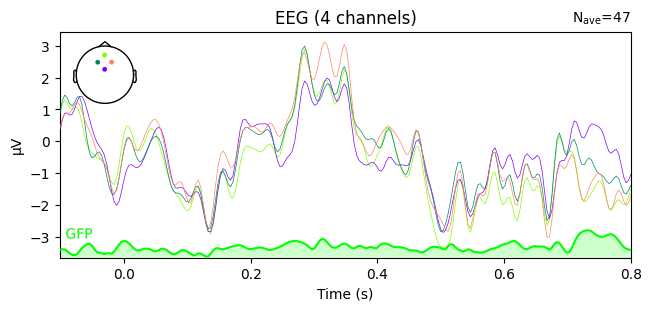

sub2 3 jhana


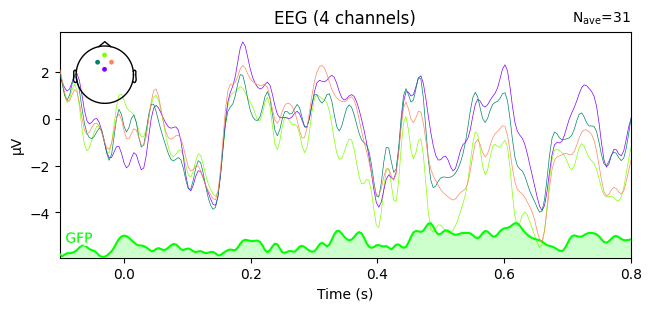

sub2 3 mindfulness


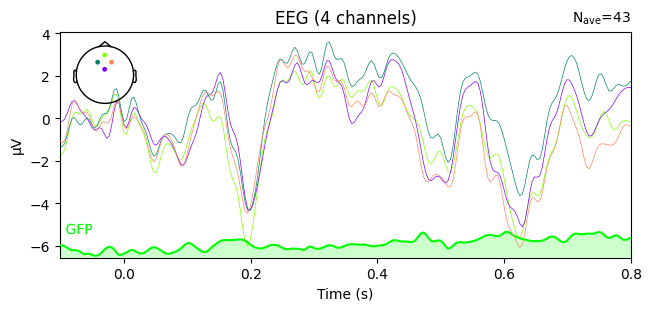

sub2 4 jhana


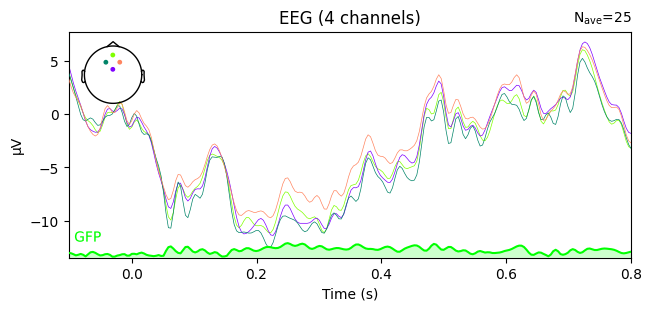

sub2 4 mindfulness


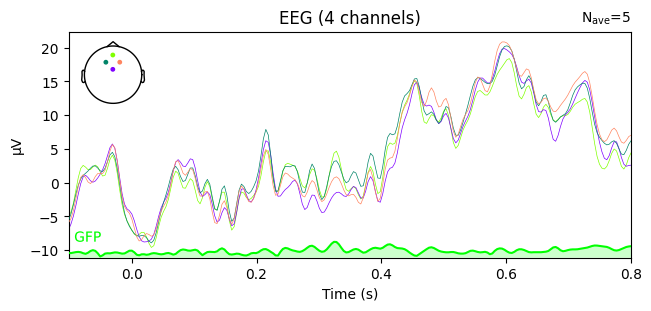

sub3 1 jhana


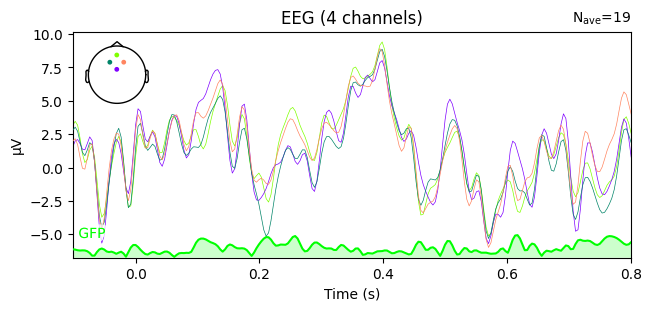

sub3 1 mindfulness


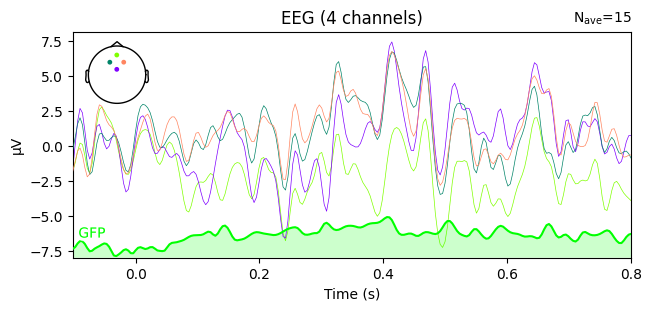

sub3 2 jhana


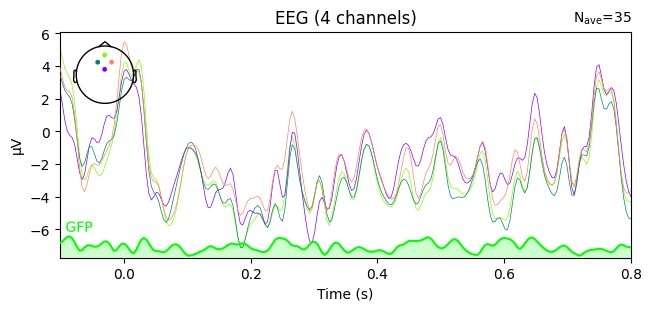

sub3 2 mindfulness


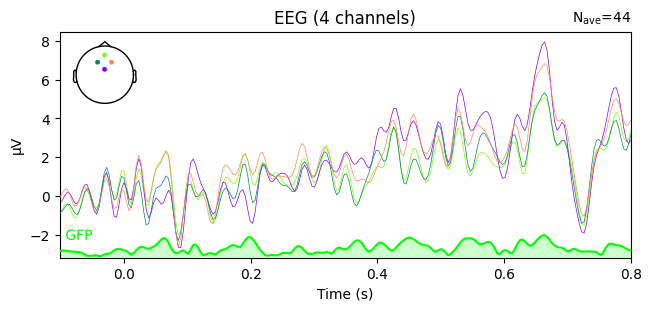

sub3 3 jhana


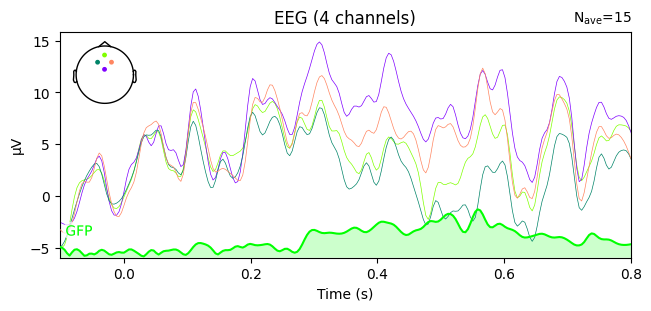

sub3 3 mindfulness


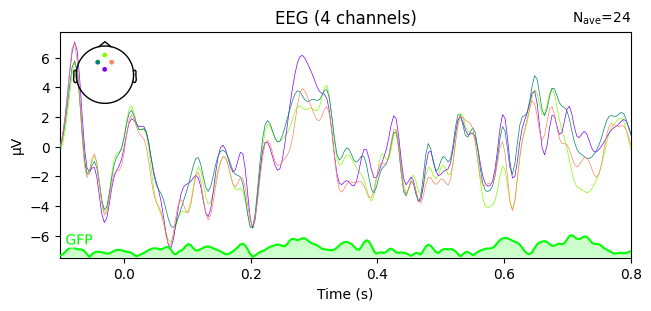

sub3 4 jhana


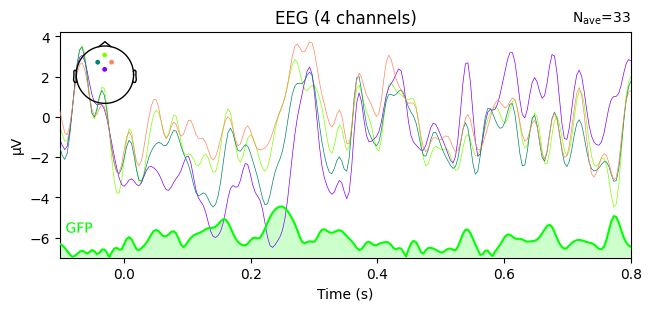

sub3 4 mindfulness


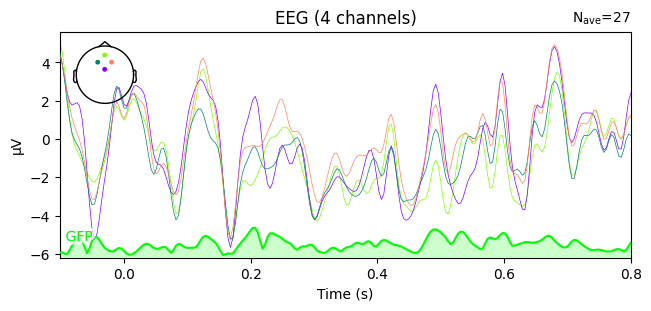

sub4 1 jhana


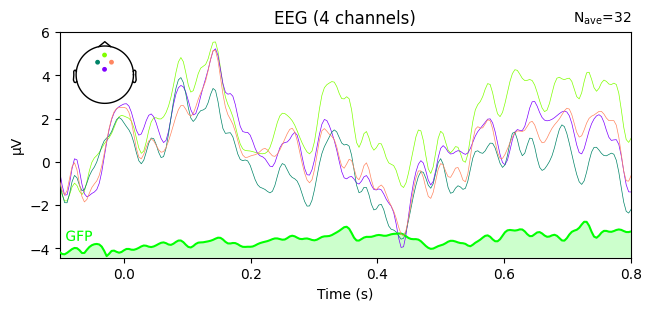

sub4 1 mindfulness


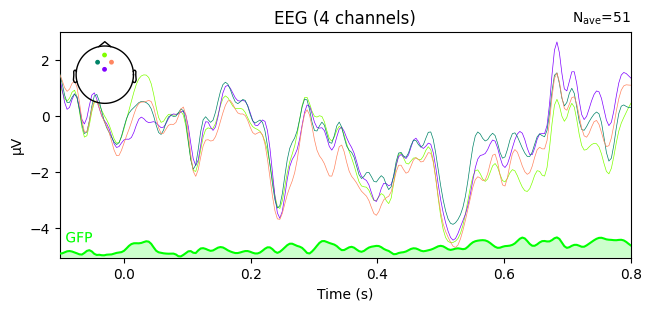

sub4 2 jhana


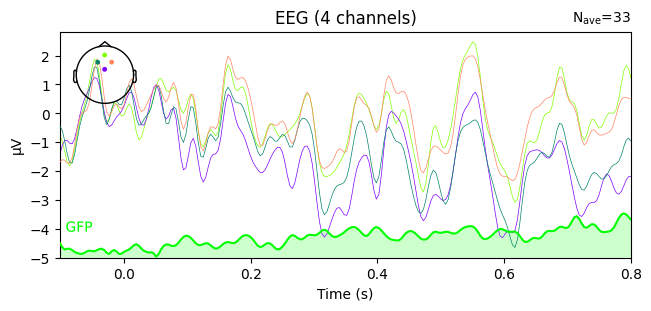

sub4 2 mindfulness


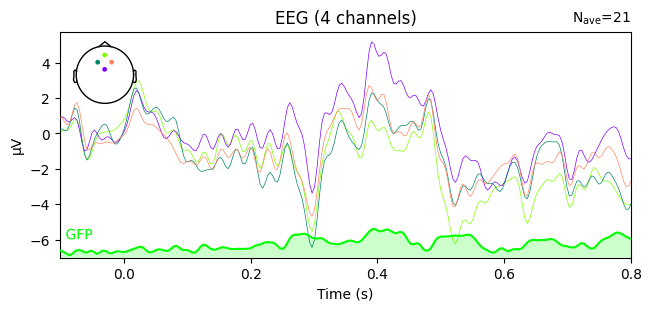

sub4 3 jhana


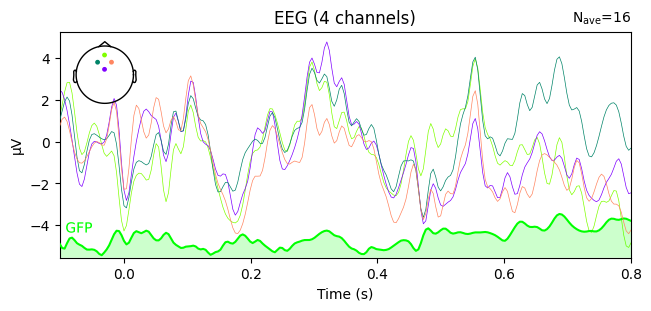

sub4 3 mindfulness


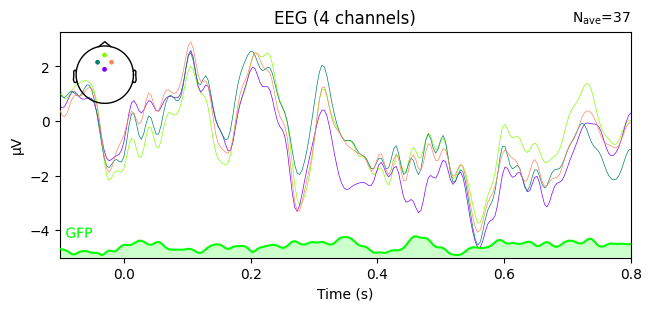

sub4 4 jhana


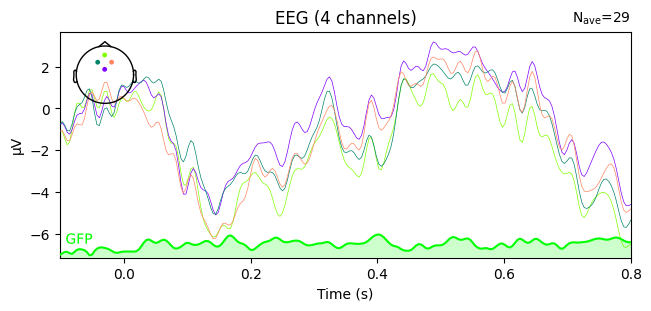

sub4 4 mindfulness


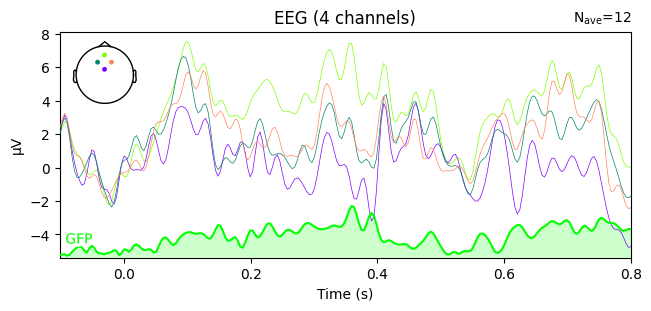

sub5 1 jhana


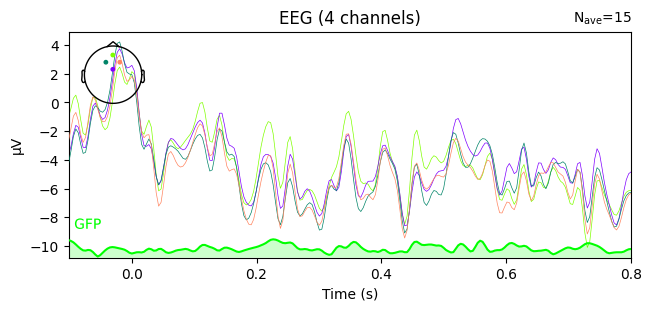

sub5 1 mindfulness


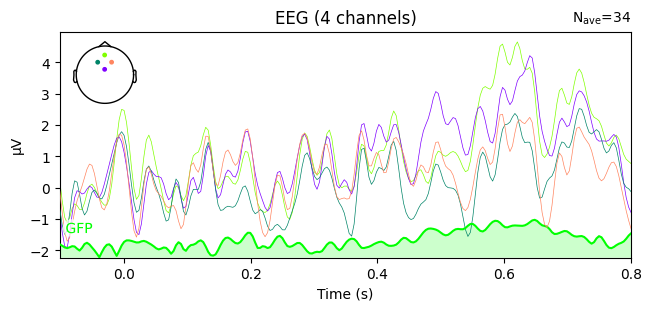

sub5 2 jhana


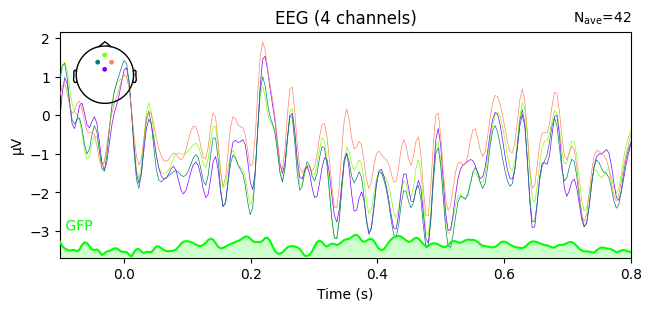

sub5 2 mindfulness


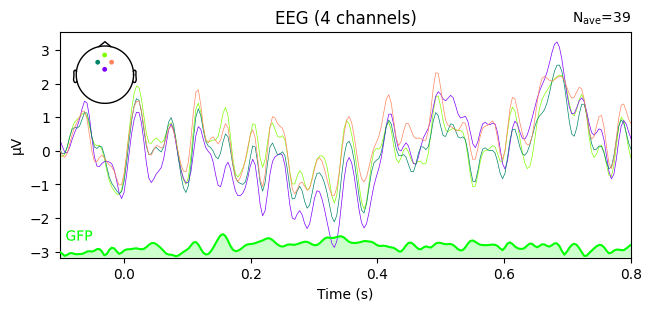

sub5 3 jhana


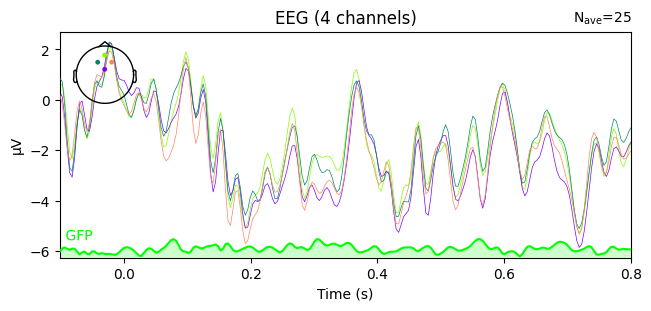

sub5 3 mindfulness


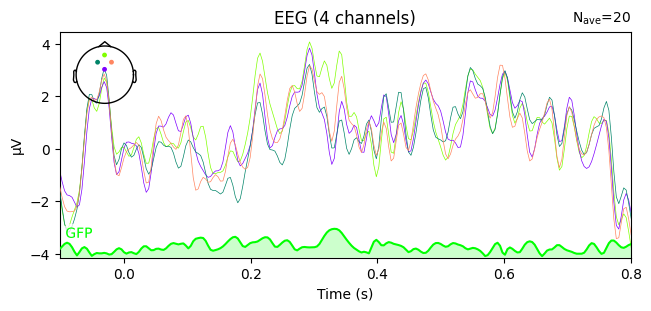

sub5 4 jhana


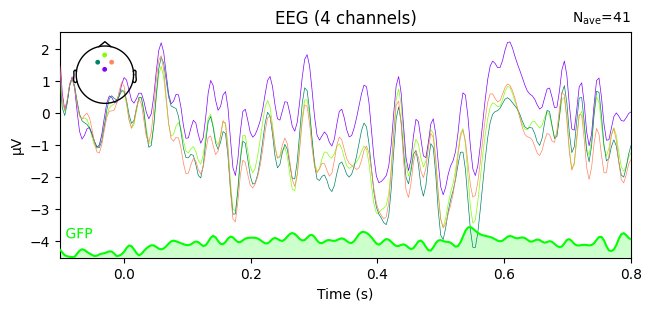

sub5 4 mindfulness


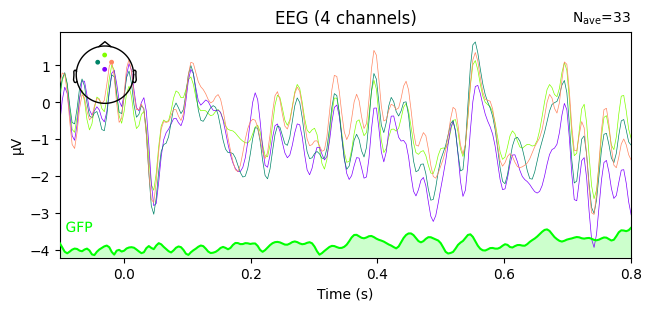

sub6 1 jhana


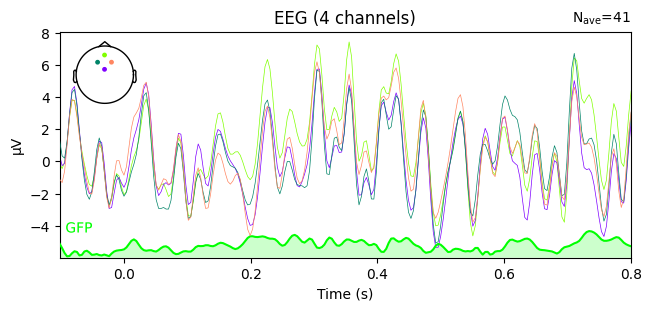

sub6 1 mindfulness


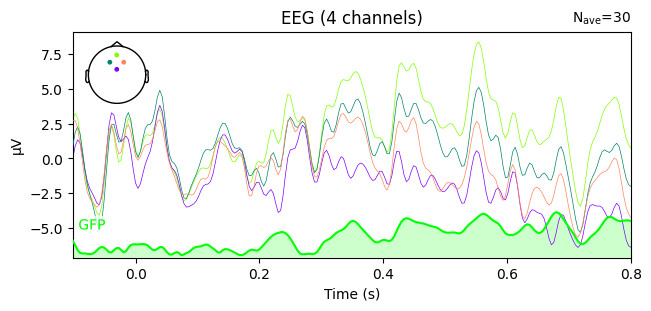

sub6 2 jhana


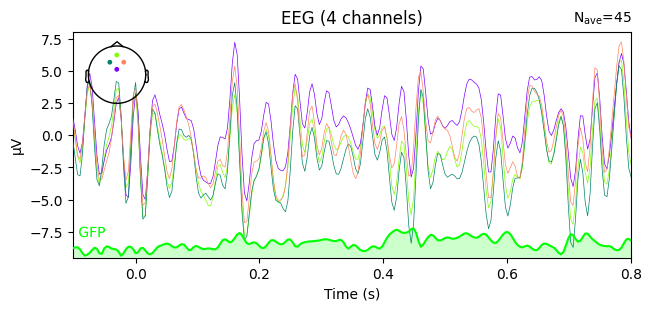

sub6 2 mindfulness


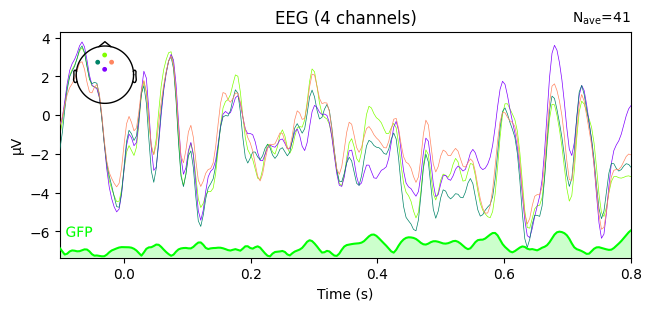

sub6 3 jhana


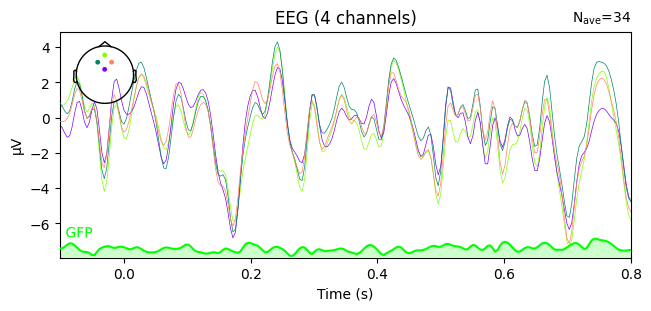

sub6 3 mindfulness


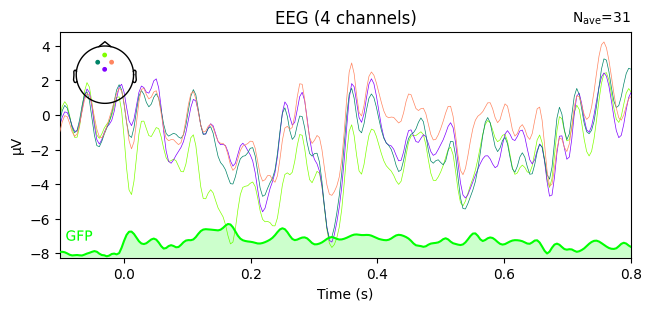

sub6 4 jhana


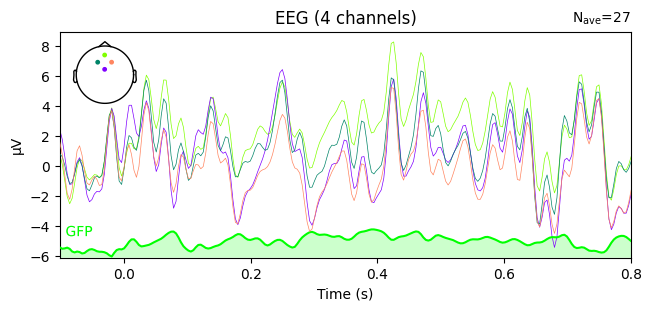

sub6 4 mindfulness


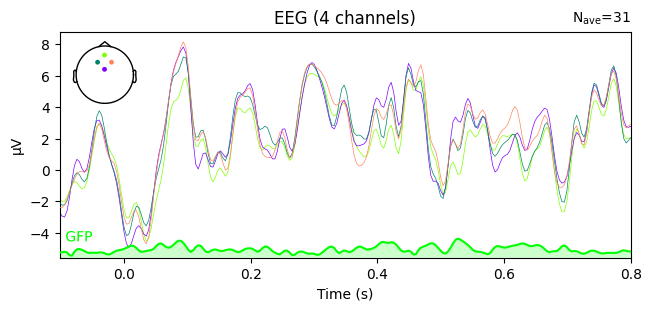

sub7 1 jhana


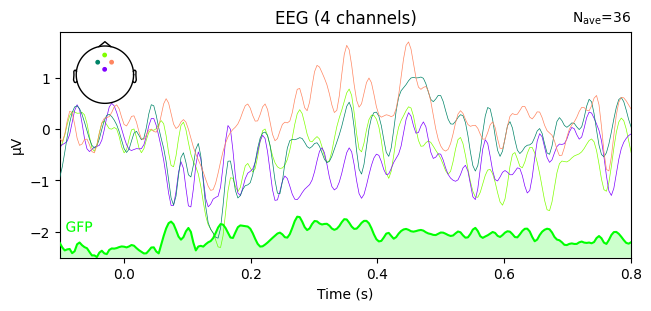

sub7 1 mindfulness


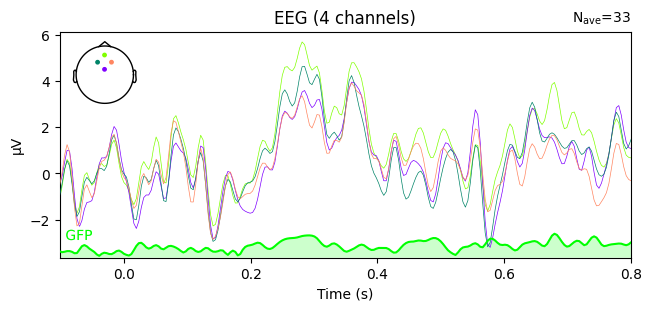

sub7 2 jhana


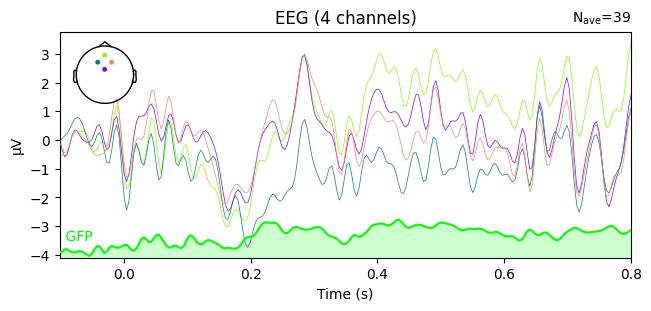

sub7 2 mindfulness
sub7 3 jhana


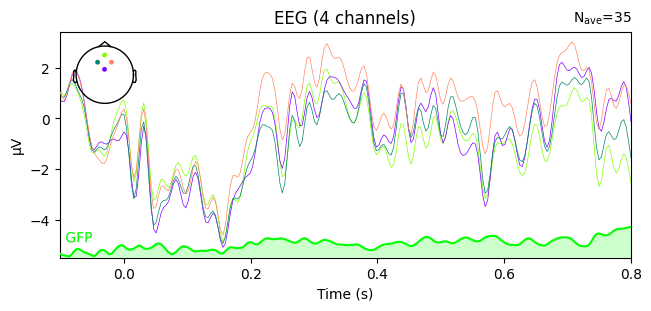

sub7 3 mindfulness


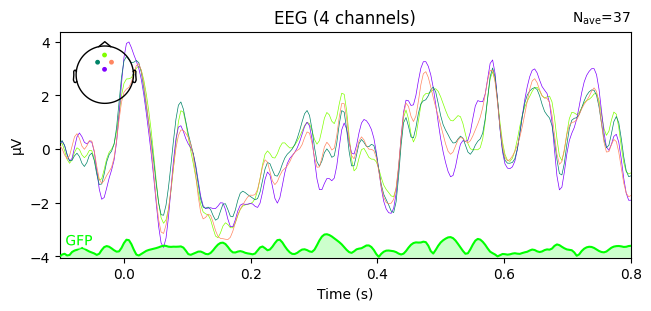

sub7 4 jhana


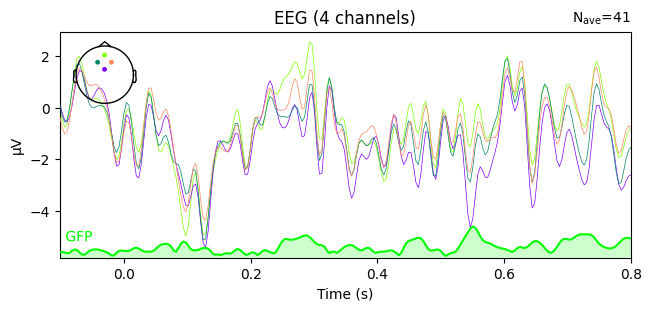

sub7 4 mindfulness
sub8 1 jhana


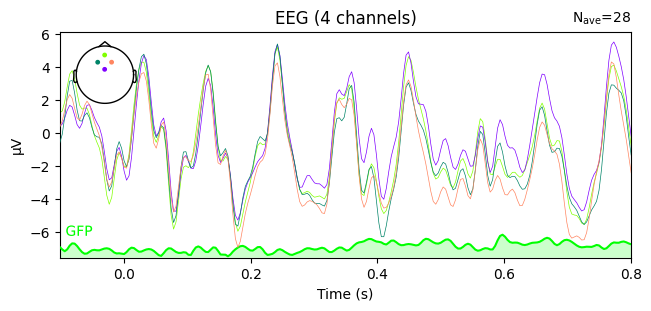

sub8 1 mindfulness


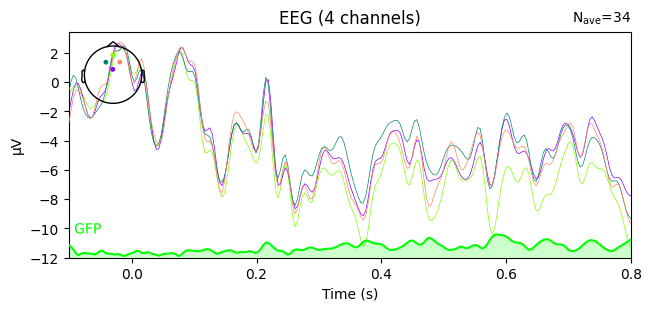

sub8 2 jhana


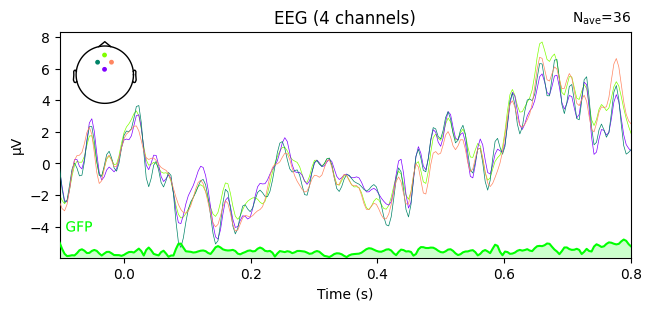

sub8 2 mindfulness


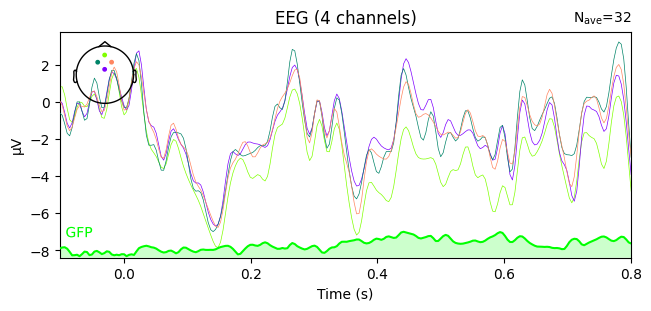

sub8 3 jhana


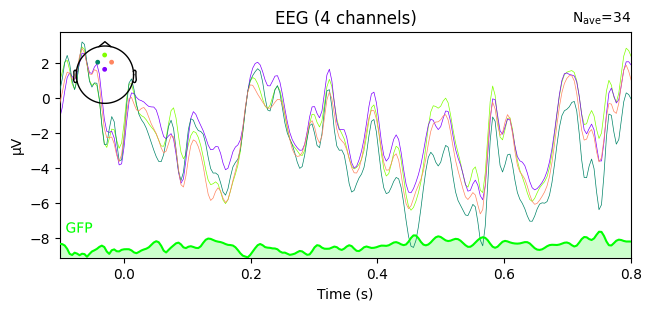

sub8 3 mindfulness


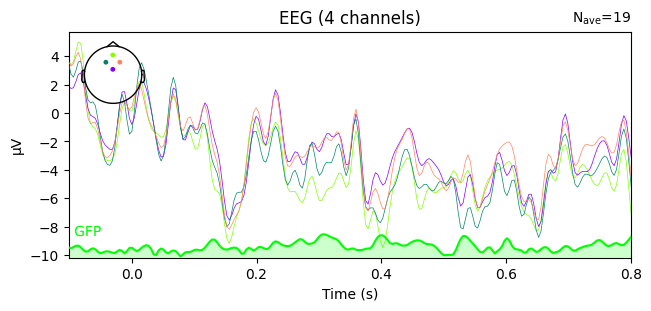

sub8 4 jhana


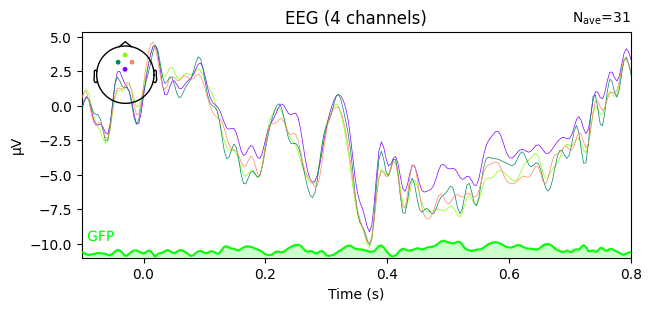

sub8 4 mindfulness


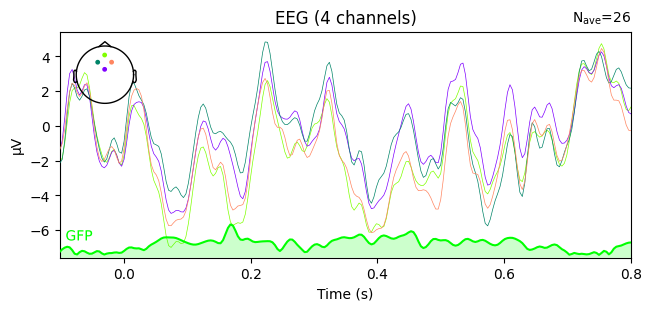

sub9 1 jhana


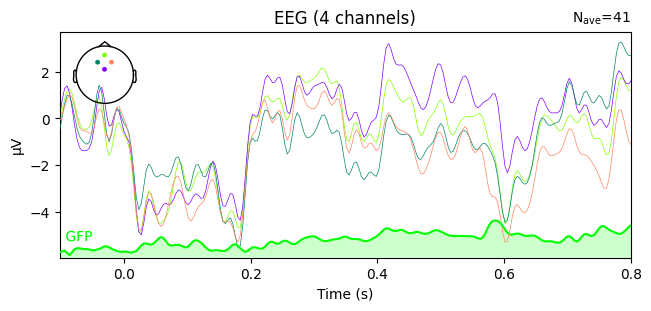

sub9 1 mindfulness


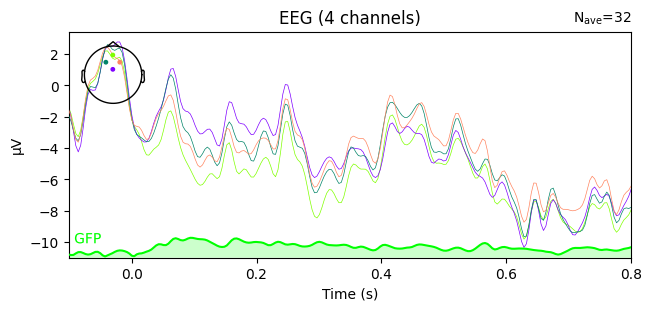

sub9 2 jhana


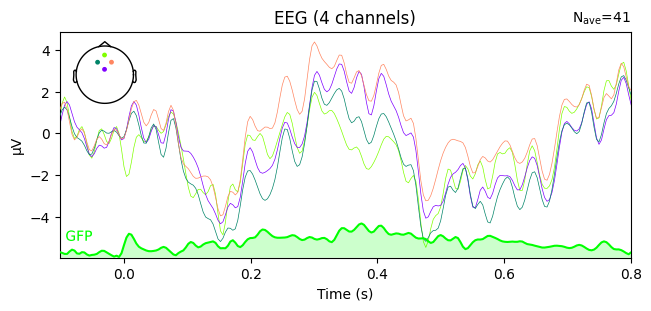

sub9 2 mindfulness


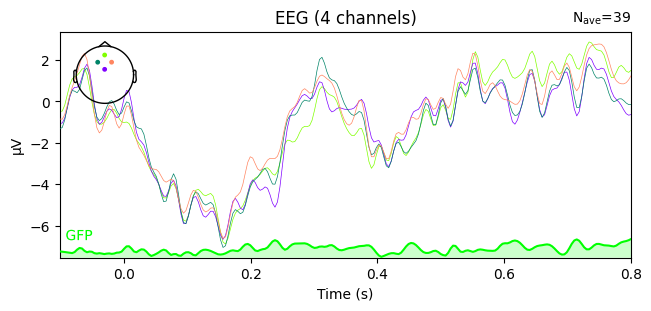

sub9 3 jhana


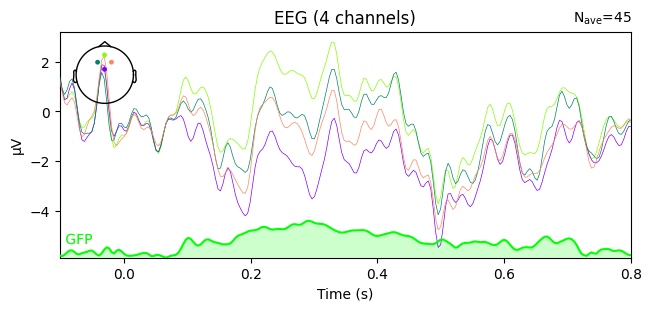

sub9 3 mindfulness


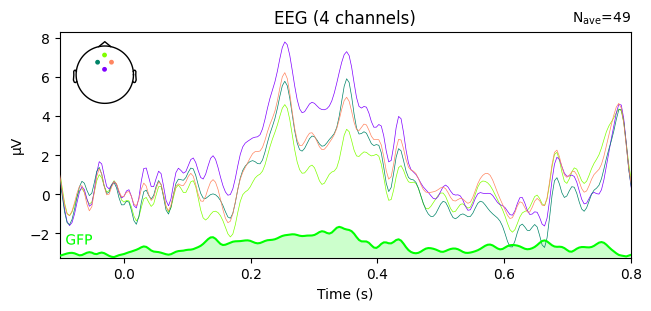

sub9 4 jhana


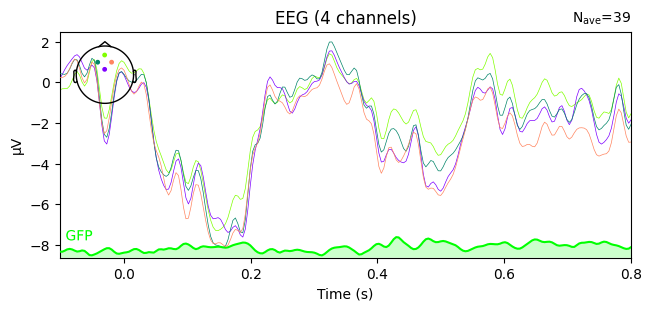

sub9 4 mindfulness


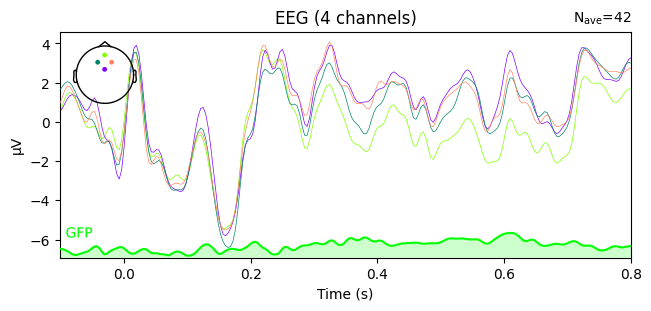

In [370]:
# loop to check each individual response and see which ones I wish to exclude

for sub in range(10):
    for day in [1,2,3,4]:
        for meditation in ['jhana', 'mindfulness']:
        
            print(f'sub{sub} {day} {meditation}')
            path = f'/Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/MMN/epochs_ar/sub{sub}-day{day}-{meditation}_epo.fif'
            try:
                epochs = mne.read_epochs(path)
                epochs.interpolate_bads(reset_bads=True).pick_types(eeg=True).filter(l_freq=None, h_freq=40)
                epochs.pick_channels(['Fz', 'Cz', 'FC1', 'FC2'])
                evokeds_dev = epochs['-1'].average()
                evokeds_std = epochs['1'].average()

                evo_m_diff = mne.combine_evoked([evokeds_dev, evokeds_std], weights=[1, -1])
                evo_m_diff.plot(window_title="Mindfulness Difference", gfp=True, time_unit="s")
            except: 
                pass

## Import and visualise the evoked responses

In [387]:
# Importing the data
evokeds = {}
for meditation in ['jhana', 'mindfulness']:
    evokeds[meditation] = {}
    evokeds[meditation]['std'] = []
    evokeds[meditation]['dev'] = []


#for sub in [0,1,2,4,7,8,9]:
for sub in range(10):
    for meditation in ['jhana', 'mindfulness']:
        paths = glob.glob(f'/Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/MMN/epochs_ar/sub{sub}-day1-{meditation}_epo.fif')
        epochs_list = [mne.read_epochs(path) for path in paths]
        epochs_list_picks = []
        
        for i in range(len(epochs_list)):
            epochs_list[i] = epochs_list[i].interpolate_bads(reset_bads=True).pick_types(eeg=True).filter(l_freq=None, h_freq=40)
                
        concatenated_epochs = mne.concatenate_epochs(epochs_list)
        evokeds[meditation]['std'].append(concatenated_epochs['1'].average())
        evokeds[meditation]['dev'].append(concatenated_epochs['-1'].average())
        

In [390]:
# Creating the evoked responses

evo_j_std = mne.combine_evoked(evokeds['jhana']['std'], weights='equal')
evo_j_dev = mne.combine_evoked(evokeds['jhana']['dev'], weights='equal')
evo_m_std = mne.combine_evoked(evokeds['mindfulness']['std'], weights='equal')
evo_m_dev = mne.combine_evoked(evokeds['mindfulness']['dev'], weights='equal')

evo_all_std = mne.combine_evoked([evo_j_std, evo_m_std], weights='equal')
evo_all_dev = mne.combine_evoked([evo_j_dev, evo_m_dev], weights='equal')
evo_all_all = mne.combine_evoked([evo_all_std, evo_all_dev], weights='nave')


overall global response


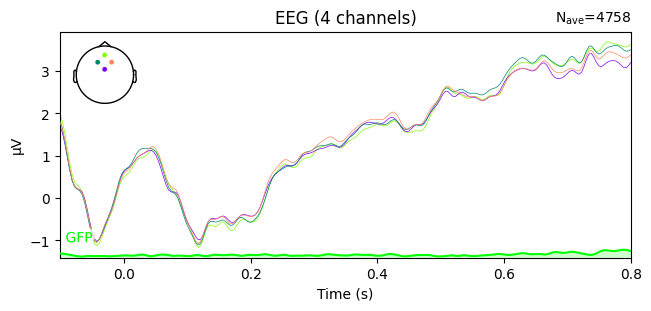

Global Evoked Response


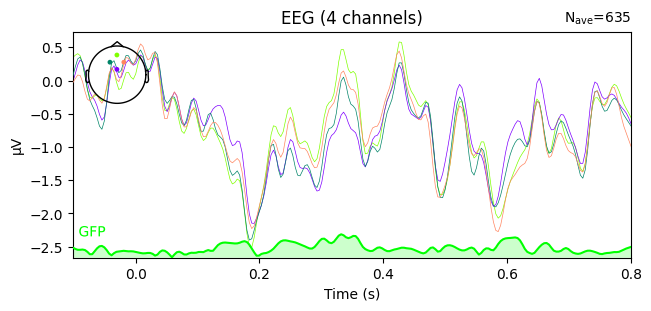

Jhana Evoked Response


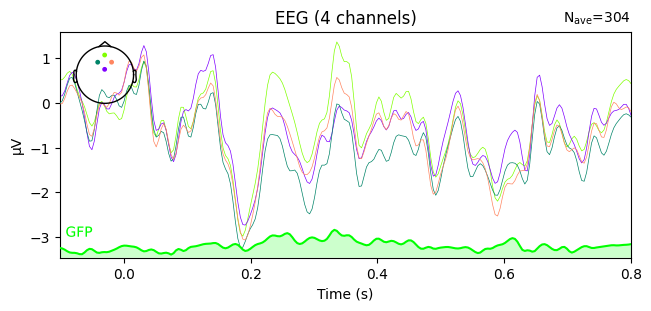

Mindfulnesss Evoked Response


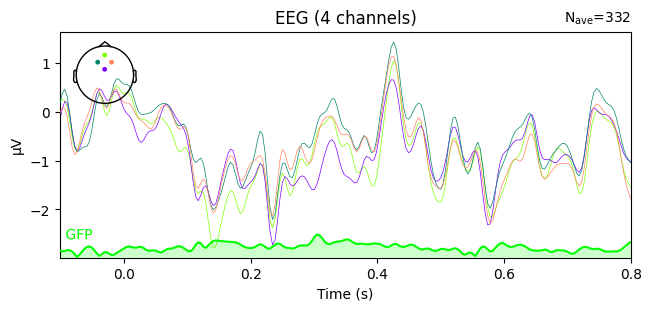

##############################
MMN, Jhana, sub: 0


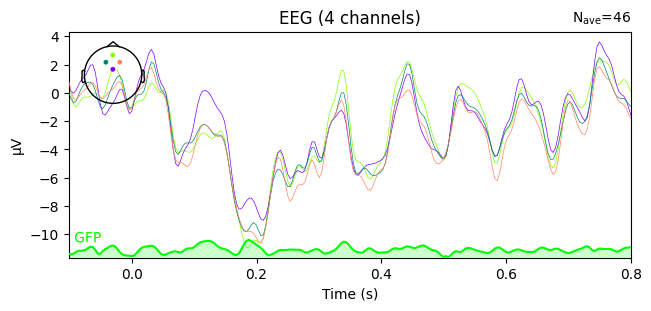

MMN, Mindfulness, sub: 0


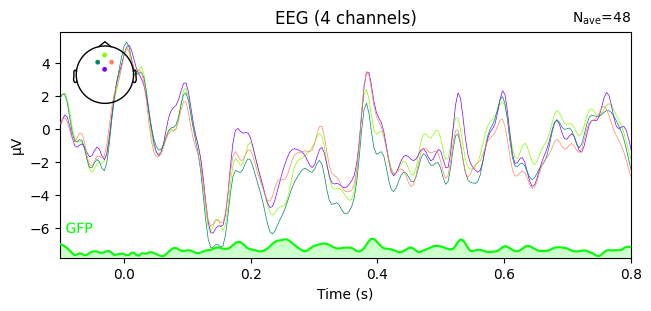

##############################
MMN, Jhana, sub: 1


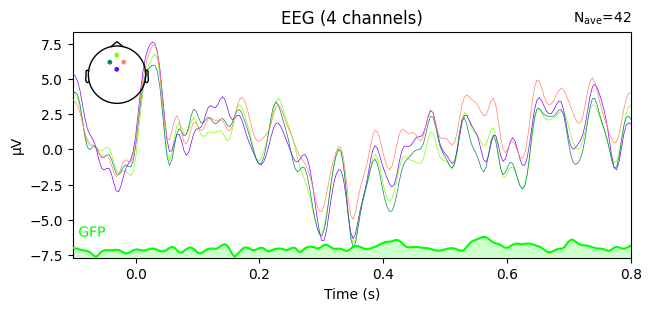

MMN, Mindfulness, sub: 1


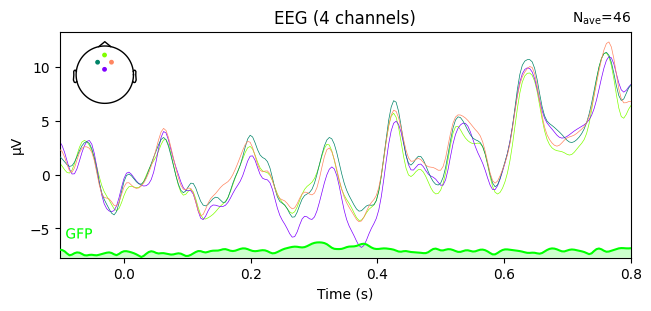

##############################
MMN, Jhana, sub: 2


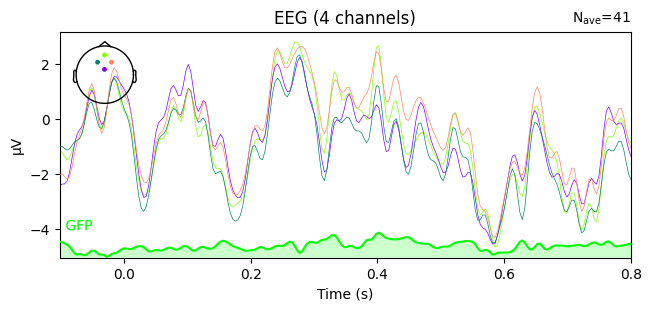

MMN, Mindfulness, sub: 2


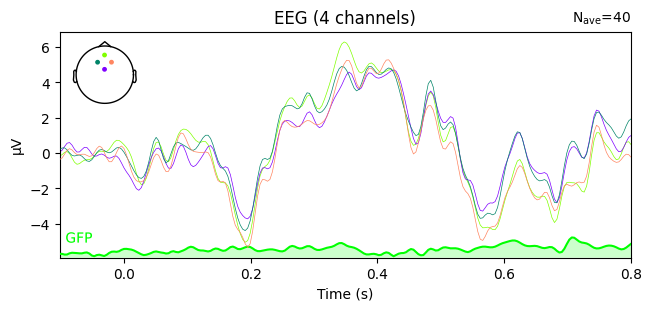

##############################
MMN, Jhana, sub: 3


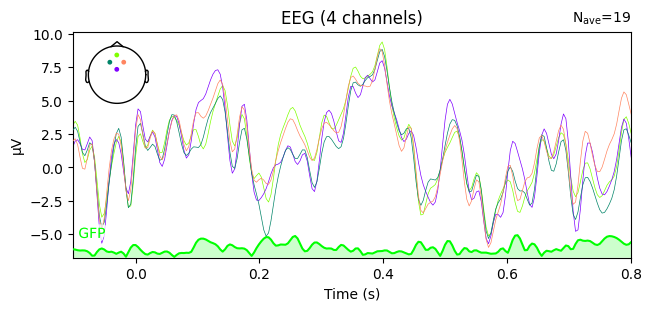

MMN, Mindfulness, sub: 3


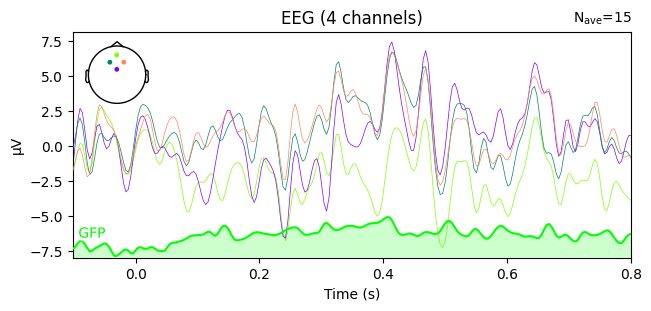

##############################
MMN, Jhana, sub: 4


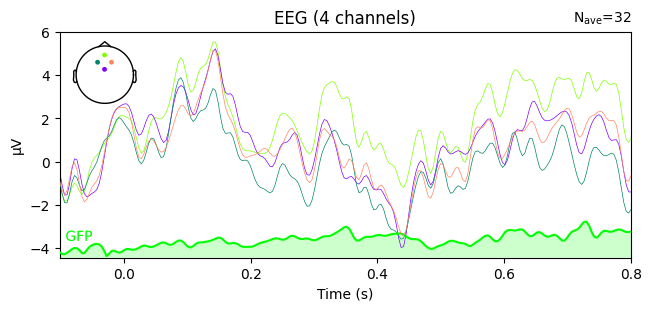

MMN, Mindfulness, sub: 4


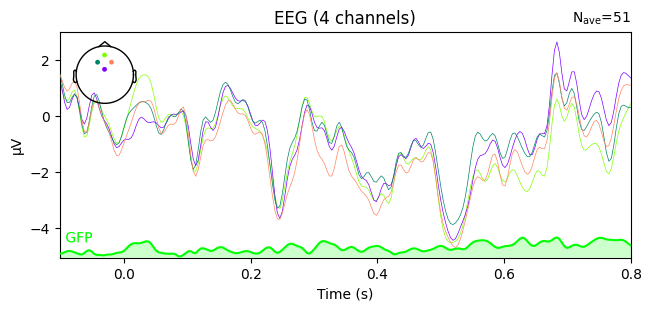

##############################
MMN, Jhana, sub: 5


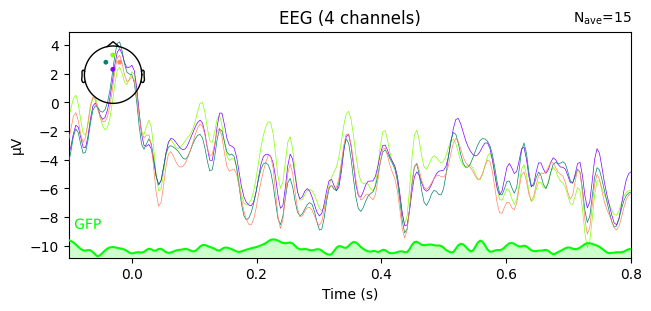

MMN, Mindfulness, sub: 5


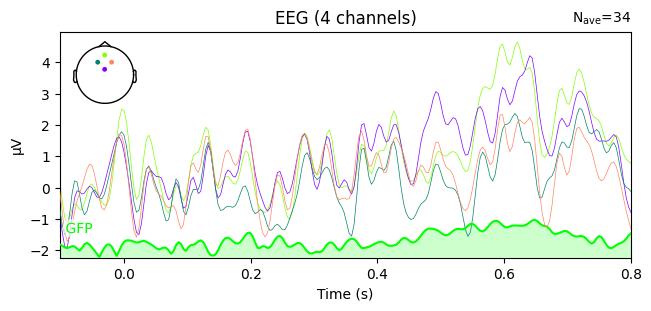

##############################
MMN, Jhana, sub: 6


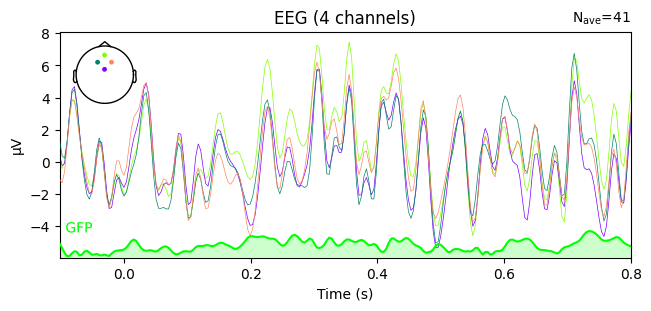

MMN, Mindfulness, sub: 6


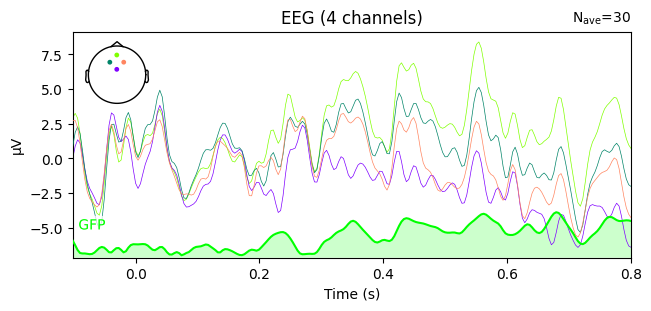

##############################
MMN, Jhana, sub: 7


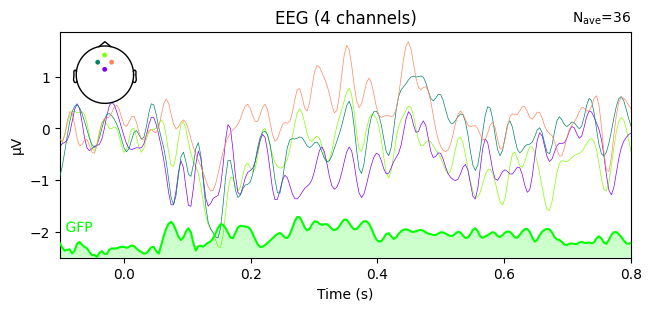

MMN, Mindfulness, sub: 7


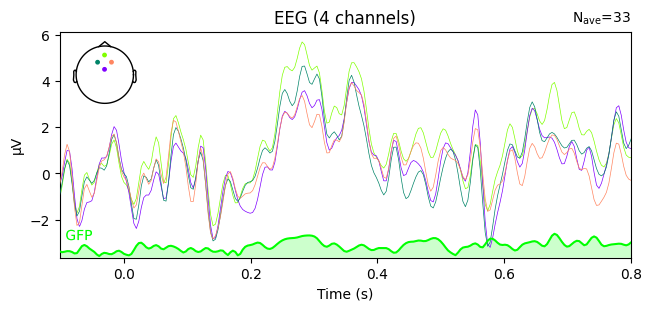

##############################
MMN, Jhana, sub: 8


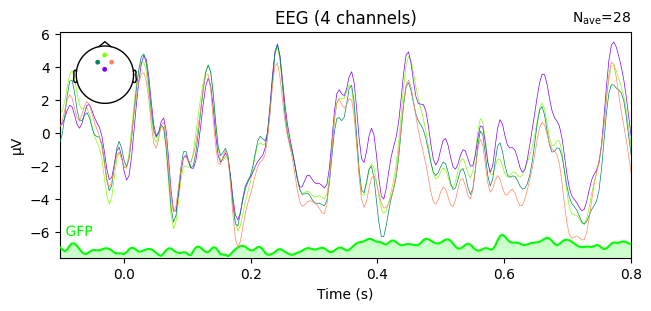

MMN, Mindfulness, sub: 8


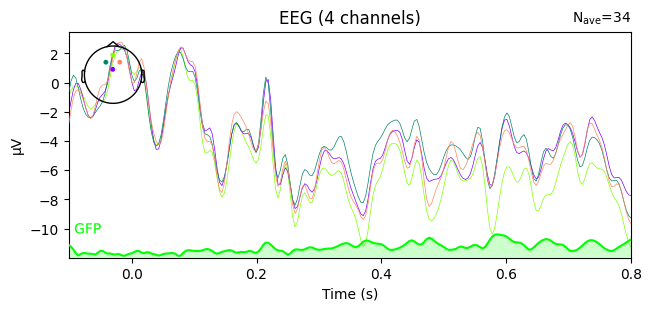

##############################
MMN, Jhana, sub: 9


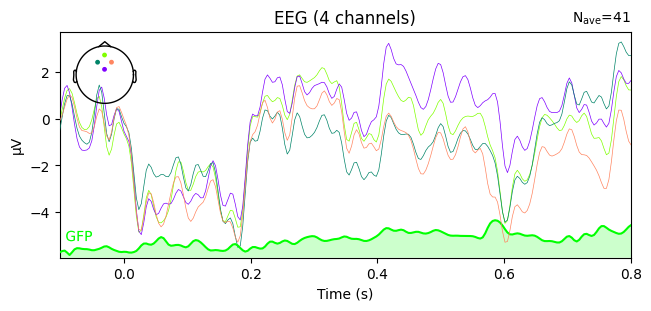

MMN, Mindfulness, sub: 9


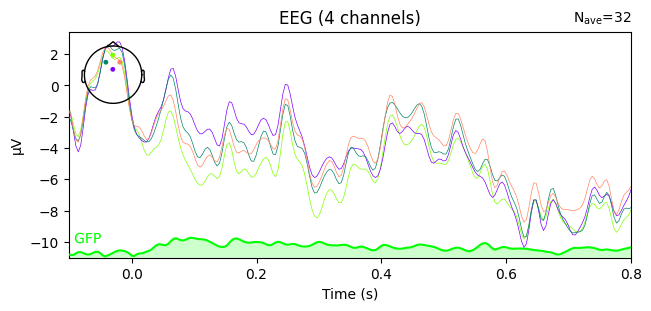

In [407]:
# Plotting the evoked responses for different conditions
print ('overall global response')
evo_all_all.copy().pick_channels(['Fz', 'Cz', 'FC1', 'FC2']).plot(window_title="overall global response", gfp=True, time_unit="s")

print('Global Evoked Response')
evo_diff = mne.combine_evoked([evo_all_dev, evo_all_std], weights=[1, -1])
evo_diff.copy().pick_channels(['Fz', 'Cz', 'FC1', 'FC2']).plot(window_title="Global Evoked Response", gfp=True, time_unit="s")

print('Jhana Evoked Response')
evo_j_diff = mne.combine_evoked([evo_j_dev, evo_j_std], weights=[1, -1])
evo_j_diff.copy().pick_channels(['Fz', 'Cz', 'FC1', 'FC2']).plot(window_title="Jhana Difference", gfp=True, time_unit="s")

print('Mindfulnesss Evoked Response')
evo_m_diff = mne.combine_evoked([evo_m_dev, evo_m_std], weights=[1, -1])
evo_m_diff.copy().pick_channels(['Fz', 'Cz', 'FC1', 'FC2']).plot(window_title="Mindfulness Difference", gfp=True, time_unit="s")



for sub in range(10):
    print (30*"#")
    print (f'MMN, Jhana, sub: {sub}')
    evo_j_diff_sub = mne.combine_evoked([evokeds['jhana']['dev'][sub], evokeds['jhana']['std'][sub]], weights=[1, -1])
    evo_j_diff_sub.copy().pick_channels(['Fz', 'Cz', 'FC1', 'FC2']).plot(window_title="Mindfulness Difference", gfp=True, time_unit="s")

    print (f'MMN, Mindfulness, sub: {sub}')
    evo_m_diff_sub = mne.combine_evoked([evokeds['mindfulness']['dev'][sub], evokeds['mindfulness']['std'][sub]], weights=[1, -1])
    evo_m_diff_sub.copy().pick_channels(['Fz', 'Cz', 'FC1', 'FC2']).plot(window_title="Mindfulness Difference", gfp=True, time_unit="s")





print ('')

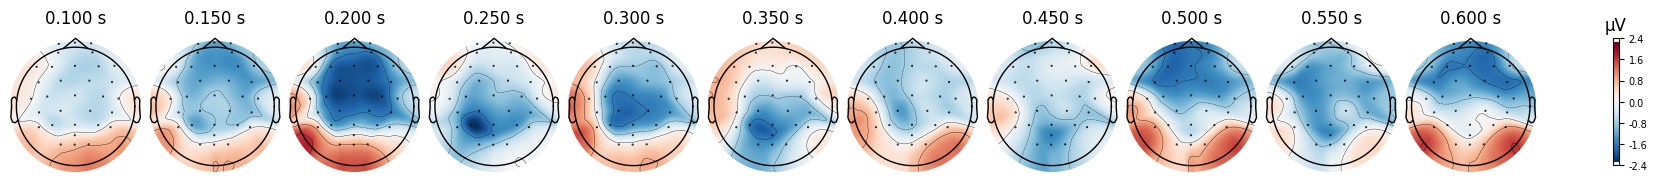

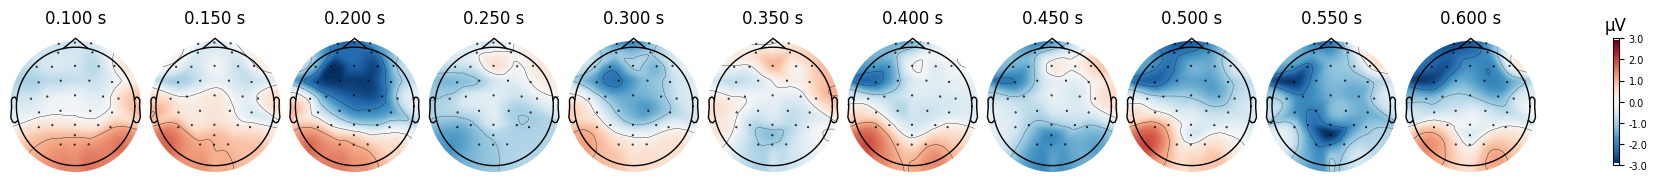

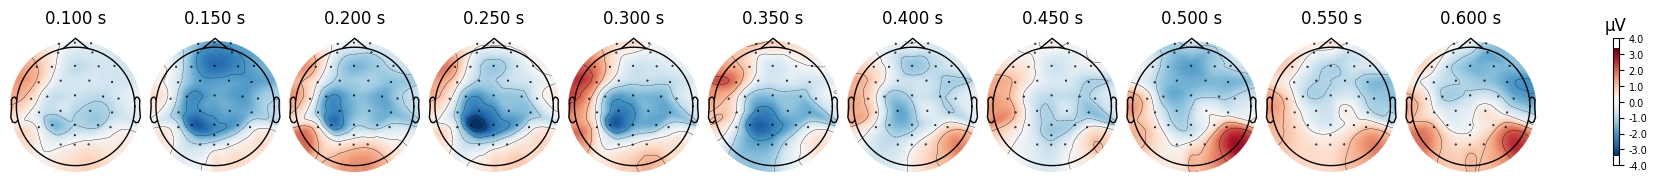

In [401]:

time_points = np.arange(0.1, 0.601, 0.05)  # Time in seconds

for evo in [evo_diff, evo_j_diff, evo_m_diff]:
    evo.plot_topomap(
        times=time_points
    )
print('')

## Make plots per subject & per condition, with resolution cpaturing all four conditions + extract values

In [234]:
pick = ['Fz', 'Cz', 'Fpz', 'F3', 'F4', 'AF3', 'AF4', 'FC1', 'FC2']
#pick = ['Fz']
show_plots = True
plt.close('all')

data = []
#for sub in [0,1,2,3,4,5,6,7,8,9,'?']:
for sub in [0,1]:
    paths_jhana = glob.glob(f'/Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/MMN/epochs/sub{sub}-day?-jhana_epo.fif')
    paths_mindf = glob.glob(f'/Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/MMN/epochs/sub{sub}-day?-mindfulness_epo.fif')
    
    epochs_list_jhana = [mne.read_epochs(path) for path in paths_jhana]
    epochs_list_mindf = [mne.read_epochs(path) for path in paths_mindf]
    
    epochs_list_picks_jhana = []
    epochs_list_picks_jhana_days = []
    for i,epoch in enumerate(epochs_list_jhana): 
        if not set(epoch.info['bads']).intersection(pick):
            epochs_list_picks_jhana.append(epoch.pick_channels(pick))
            epochs_list_picks_jhana_days.append(os.path.basename(paths_jhana[i])[5:9])
            
    
    epochs_list_picks_mindf = []
    epochs_list_picks_mindf_days = []
    for i, epoch in enumerate(epochs_list_mindf): 
        if not set(epoch.info['bads']).intersection(pick):
            epochs_list_picks_mindf.append(epoch.pick_channels(pick))
            epochs_list_picks_mindf_days.append(os.path.basename(paths_mindf[i])[5:9])

    if (len(epochs_list_picks_jhana)>1 and len(epochs_list_picks_mindf)>1):

        if show_plots: 
            concatenated_epochs_jhana = mne.concatenate_epochs(epochs_list_picks_jhana)
            concatenated_epochs_mindf = mne.concatenate_epochs(epochs_list_picks_mindf)
            
            evoked_std_mindf = concatenated_epochs_mindf['1'].average()
            evoked_odd_mindf = concatenated_epochs_mindf['-1'].average()
            evoked_std_jhana = concatenated_epochs_jhana['1'].average()
            evoked_odd_jhana = concatenated_epochs_jhana['-1'].average()
            
            times = evoked_std_mindf.times
                    
            std_mindf_avg = evoked_std_mindf.get_data().mean(axis=0)
            odd_mindf_avg = evoked_odd_mindf.get_data().mean(axis=0)
            mmn_mind = odd_mindf_avg - std_mindf_avg
            std_jhana_avg = evoked_std_jhana.get_data().mean(axis=0)
            odd_jhana_avg = evoked_odd_jhana.get_data().mean(axis=0)
            mmn_jhana = odd_jhana_avg - std_jhana_avg
            
            plt.figure(figsize=(10, 6))
            plt.plot(times, mmn_mind, label='mmn_mind', color='blue')
            plt.plot(times, mmn_jhana, label='mmn_jhana', color='green')
                        
            plt.xlabel('Time (s)')
            plt.ylabel('Amplitude (µV)')
            sample_n = len(concatenated_epochs_mindf)+len(concatenated_epochs_jhana)
            title = f'Averaged Evoked Responses Across All Channels for subject: {sub}, sample_n={sample_n}'
            plt.title(title)
            plt.axvline(0, color='black', linestyle='--', label='Stimulus Onset')  # Add a vertical line at stimulus onset
            plt.legend()
            
            #plt.ylim([-0.00001, 0.00001])
            
            plt.savefig(f'figures/{title}.png')

            #plt.show()
            
    
            if sub == '?':
                evoked_std_mindf = concatenated_epochs_mindf['1'].average()
                evoked_odd_mindf = concatenated_epochs_mindf['-1'].average()
                evoked_std_jhana = concatenated_epochs_jhana['1'].average()
                evoked_odd_jhana = concatenated_epochs_jhana['-1'].average()
                
                fig = evoked_std_mindf.plot()
                fig = evoked_odd_mindf.plot()
                fig = evoked_std_jhana.plot()
                fig = evoked_odd_jhana.plot()


    ################################
    # extract means into dataframe #
    ################################
    if sub != '?':
        for epoch_list, epoch_list_days, meditation_type in zip(
            [epochs_list_picks_jhana, epochs_list_picks_mindf],
            [epochs_list_picks_jhana_days, epochs_list_picks_mindf_days],
            ['jhana', 'mindfulness']
        ):
            for i, epochs in enumerate(epoch_list):
                day = epoch_list_days[i]
                for time_start, time_end, time_name in zip(
                    [54, 54],
                    [58, 74], 
                    ['early_short', 'early_long']
                    ):         
                    
                    mean_std = np.mean(epochs['1'].get_data()[:,:,time_start:time_end])*10**6
                    mean_odd = np.mean(epochs['-1'].get_data()[:,:,time_start:time_end])*10**6
                    mmn = mean_std - mean_odd
                    sample_n = len(epochs)
                    data.append([sub, day, meditation_type, time_name, pick, sample_n, mean_std, mean_odd, mmn])
                        
df = pd.DataFrame(data, columns=['sub', 'day', 'meditation_type', 'time_name', 'pick', 'sample_n', 'mean_std', 'mean_odd', 'mmn'])    
df.to_csv('mean_values.csv', index=False)


## multi-level linear model 

In [233]:
import pandas as pd
import statsmodels.formula.api as smf

# Ensure categorical columns are treated as such
df['sub'] = df['sub'].astype('category')
df['day'] = df['day'].astype('category')
df['meditation_type'] = df['meditation_type'].astype('category')
df['time_name'] = df['time_name'].astype('category')

# Fit a mixed effects linear model with random intercepts for 'sub'
model = smf.mixedlm(
    "mmn ~ day + meditation_type + condition + time_name",  # Fixed effects
    df, 
    groups=df["sub"],  # Random effect for 'sub'
)

# Fit the model
result = model.fit()

# Print the results
print(result.summary())


PatsyError: Error evaluating factor: NameError: name 'condition' is not defined
    mmn ~ day + meditation_type + condition + time_name
                                  ^^^^^^^^^

## Interpretation of the results
Looks like that the type of meditaiton does not have any significant effect on the mmn.  
When visually inspecting the MMNs this is confirmed, so yeah, looks like not much we can do. 

## Legacy Function: Old Old --> visualisation with all four tones

In [9]:
plot_all = True
for sub in range(2):
    for condition in ['jhana', 'mindfulness']:
        
        # Read epochs
        path = f"epochs/sub{sub}_{condition}_epo.fif"
        epochs = mne.read_epochs(path)
        evokeds = get_evokeds(epochs)
        
        # Compute mismatch data
        oddball = epochs["-1"].average()
        standard = epochs["1"].average()
        mismatch_data = standard.data - oddball.data
        mismatch = mne.EvokedArray(mismatch_data, standard.info, tmin=standard.times[0])

        if plot_all: 
            # Plot both evoked responses and mismatch negativity in one plot
            fig, ax = plt.subplots()
            mne.viz.plot_compare_evokeds(evokeds, ci=0.95, title=f'Global oddball evoked response and MMN: {condition}_sub_{sub}', axes=ax)
            mne.viz.plot_compare_evokeds({'MMN': mismatch}, ci=0.95, axes=ax, colors={'MMN': 'cyan'})
    
            
            # Set the y-axis limits
            ax.set_ylim([-10, 10])
            
            # Add vertical lines and shaded region
            ax.axvline(x=0.15, color='b', linestyle=':', label='Stimulus Onset 0.15s')
            ax.axvline(x=0.3, color='b', linestyle=':', label='Stimulus Onset 0.3s')
            ax.axvline(x=0.45, color='b', linestyle=':', label='Stimulus Onset 0.45s')
            ax.axvline(x=0.6, color='r', linestyle='--', label='Stimulus Onset 0.6s')
            ax.axvspan(0.75, 0.85, color='gray', alpha=0.3, label='MMN')
            ax.axvspan(0.85, 1.1, color='black', alpha=0.3, label='P3')
            ax.legend()
            
            # Save the figure
            fig.savefig(f'figures/sub{sub}_{condition}_combined.png')
            plt.close(fig)
        
        if condition == 'jhana':
            mismatch_jhana = mismatch.copy()
        if condition == 'mindfulness':
            mismatch_mindfulness = mismatch.copy()

    title = f'Mismatch Negativity (MMN) Response: sub_{sub}.png'
    fig, ax = plt.subplots()
    mne.viz.plot_compare_evokeds({'MMN_jhana': mismatch_jhana, 'MMN_mindfulness': mismatch_mindfulness}, ci=0.95, title=title, axes=ax)
    ax.set_ylim([-10, 10])
    ax.axvline(x=0.15, color='b', linestyle=':', label='Stimulus Onset 0.15s')
    ax.axvline(x=0.3, color='b', linestyle=':', label='Stimulus Onset 0.3s')
    ax.axvline(x=0.45, color='b', linestyle=':', label='Stimulus Onset 0.45s')
    ax.axvline(x=0.6, color='r', linestyle='--', label='Stimulus Onset 0.6s')
    ax.axvspan(0.75, 0.85, color='gray', alpha=0.3, label='MMN')
    ax.axvspan(0.85, 1.1, color='black', alpha=0.3, label='P3')
    ax.legend()
    fig.savefig(f'figures/{title}.png')
    plt.close(fig)

Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/MMN/epochs/2_by_subject/sub0_jhana_len4_epo.fif ...
    Found the data of interest:
        t =    -101.56 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
1443 matching events found
No baseline correction applied
0 projection items activated


NameError: name 'ax' is not defined